<a href="https://colab.research.google.com/github/xhxuciedu/CS206/blob/master/Least_Square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem:  Predict mpg (miles per gallon) from horsepower

In [2]:
# Download a real dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
data = pd.read_csv(url)

# Keep it simple: Predict mpg (miles per gallon) from horsepower
data = data[['horsepower', 'mpg']].dropna()

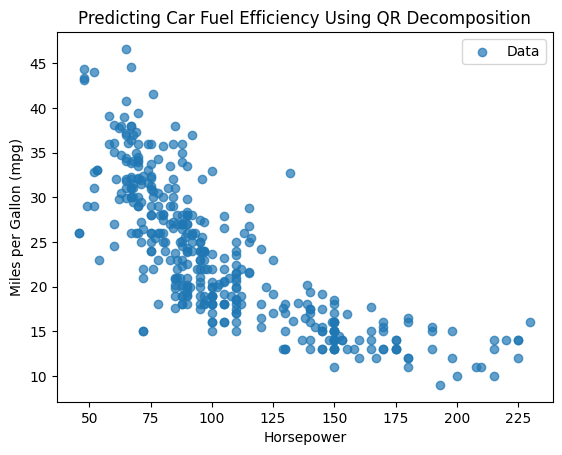

In [17]:
# Plot the data
plt.scatter(data['horsepower'], data['mpg'], label="Data", alpha=0.7)
plt.xlabel("Horsepower")
plt.ylabel("Miles per Gallon (mpg)")
plt.title("Predicting Car Fuel Efficiency Using QR Decomposition")
plt.legend()
plt.show()

In [3]:
X = data['horsepower'].values.reshape(-1, 1)
y = data['mpg'].values

# Add a bias (intercept) term manually
X_design = np.hstack([np.ones((X.shape[0], 1)), X])

In [7]:
X_design.shape

(392, 2)

## Comparing Two Approaches for Least Square Problems:

| Aspect       | Normal Equations                        | QR Decomposition                          |
|--------------|-----------------------------------------|-------------------------------------------|
| Formula      | Solve $(A^T A)x = A^T b$             | Solve $Rx = Q^T b$                     |
| Computation  | Requires matrix multiplication and inversion | Only needs QR decomposition and solving a triangular system |
| Stability    | Poor if $A$ is ill-conditioned       | More stable                               |
| Speed        | Slightly faster for very small problems | More reliable for real-world data         |


In [20]:
# --- Solution 1: Normal Equations ---
# (X^T X) x = X^T y
XtX = X_design.T @ X_design
Xty = X_design.T @ y
x_normal = np.linalg.solve(XtX, Xty)

# --- Solution 2: QR Decomposition ---
Q, R = np.linalg.qr(X_design)
x_qr = np.linalg.solve(R, Q.T @ y)

# --- Predictions ---
y_pred_normal = X_design @ x_normal
y_pred_qr = X_design @ x_qr

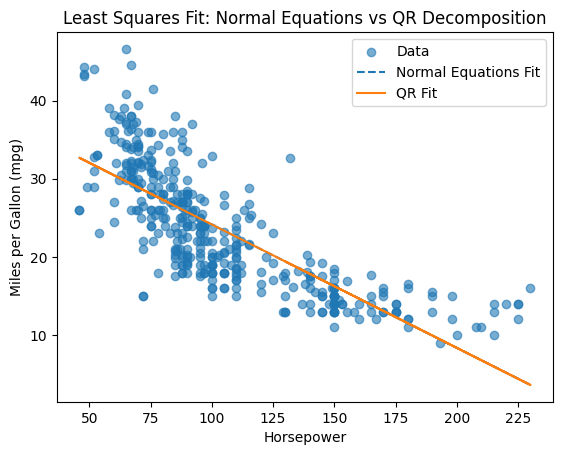

Coefficients from Normal Equations: [39.93586102 -0.15784473]
Coefficients from QR Decomposition: [39.93586102 -0.15784473]

Residual norm (Normal Equations): 96.88093657646182
Residual norm (QR Decomposition): 96.88093657646182


In [21]:
# --- Plot results ---
plt.scatter(X, y, label="Data", alpha=0.6)
plt.plot(X, y_pred_normal, label="Normal Equations Fit", linestyle='--')
plt.plot(X, y_pred_qr, label="QR Fit", linestyle='-')
plt.xlabel("Horsepower")
plt.ylabel("Miles per Gallon (mpg)")
plt.title("Least Squares Fit: Normal Equations vs QR Decomposition")
plt.legend()
plt.show()

# --- Print and Compare ---
print("Coefficients from Normal Equations:", x_normal)
print("Coefficients from QR Decomposition:", x_qr)

# --- Check error ---
error_normal = np.linalg.norm(X_design @ x_normal - y)
error_qr = np.linalg.norm(X_design @ x_qr - y)

print("\nResidual norm (Normal Equations):", error_normal)
print("Residual norm (QR Decomposition):", error_qr)

## An example showing solving Least Square with QR decomposion is much better.

In [28]:
np.linalg.svdvals(A)

array([12.49565357, 11.62950165, 10.50823833, 10.31385632,  9.79109844,
        9.41258468,  9.06918554,  8.677895  ,  7.84749139,  6.81849531])

In [29]:
np.linalg.eigvals(A.T @ A)

array([156.14135803, 135.24530869,  46.49187829,  61.58312106,
       110.42307273, 106.37563229,  75.3058616 ,  95.86560868,
        82.25012637,  88.59675038])

In [32]:
# Create a truly near-singular matrix A
np.random.seed(42)

m, n = 10, 5  # small size to make singularity obvious
A = np.random.randn(m, n)

# Make two columns almost identical → forces near-singularity
A[:, 1] = A[:, 0] + 1e-8 * np.random.randn(m)  # column 1 ≈ column 0
A[:, 3] = A[:, 2] + 1e-8 * np.random.randn(m)  # column 3 ≈ column 2

# True x
x_true = np.random.randn(n)

# Generate b
b = A @ x_true

# --- Solve by Normal Equations ---
try:
    x_normal = np.linalg.solve(A.T @ A, A.T @ b)
    normal_failed = False
except np.linalg.LinAlgError:
    normal_failed = True
    x_normal = None
    print("Normal equations failed due to singular matrix.")

# --- Solve by QR Decomposition ---
Q, R = np.linalg.qr(A)
x_qr = np.linalg.solve(R, Q.T @ b)

# --- Compare ---
if not normal_failed:
    error_normal = np.linalg.norm(A @ x_normal - b)
    print("Residual norm (Normal Equations):", error_normal)
    print("Error in coefficients (Normal Equations):", np.linalg.norm(x_normal - x_true))
else:
    print("Normal equations could not solve the system.")

error_qr = np.linalg.norm(A @ x_qr - b)
print("Residual norm (QR Decomposition):", error_qr)
print("Error in coefficients (QR Decomposition):", np.linalg.norm(x_qr - x_true))


Residual norm (Normal Equations): 3.769829549936183e-08
Error in coefficients (Normal Equations): 2.7101450003659875
Residual norm (QR Decomposition): 2.4043442600993574e-15
Error in coefficients (QR Decomposition): 1.5339532344218213e-07


In [33]:
x_normal

array([ 2.20334948, -0.3039173 ,  0.49299236,  1.03582525, -2.61974511])

In [34]:
x_qr

array([ 0.3613957 ,  1.53803647, -0.03582609,  1.56464371, -2.6197451 ])

In [35]:
x_true

array([ 0.36139561,  1.53803657, -0.03582604,  1.56464366, -2.6197451 ])

In [38]:
np.linalg.svdvals(A)

array([4.15470918e+00, 3.42426936e+00, 2.66580668e+00, 1.62150910e-08,
       7.88002066e-09])

## Observation

* Normal equations amplify instability when the matrix is ill-conditioned. QR decomposition avoids squaring the condition number and remains robust — that's why professional solvers avoid normal equations unless the matrix is guaranteed well-conditioned.

* Normal Equations = risky when A is ill-conditioned.

* QR = stable even when A is almost singular.

* In professional numerical computing (scientific computing, machine learning libraries, engineering), QR or SVD is always preferred over direct normal equations.